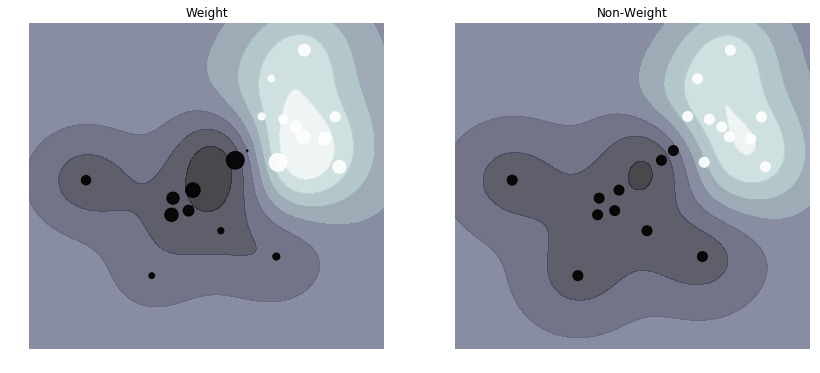

In [31]:
import numpy as np
np.random.seed(0)
X = np.r_[np.random.randn(10,2)+[2,2],np.random.randn(10,2)]
y = np.r_[[1]*10,[-1]*10]
sample_weight = abs(np.random.randn(len(X)))
sample_weight[15:] *= 5
sample_weight[9] *= 15
sample_non_weight = np.ones(len(X))
from sklearn import svm
clf_weight = svm.SVC()
clf_non_weight = svm.SVC()
clf_weight.fit(X,y,sample_weight = sample_weight)
clf_non_weight.fit(X,y)
def plot_decision_surface(clf,sample_weight,axis,title):
    xx,yy = np.meshgrid(np.linspace(-4,5,500),np.linspace(-4,5,500))
    Z = clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
    Z = Z.reshape(xx.shape)
    axis.contourf(xx,yy,Z,alpha = 0.75,cmap = plt.cm.bone)
    axis.scatter(X[:,0],X[:,1],c = y,alpha = 0.9,s = 100*sample_weight,cmap = plt.cm.bone)
    axis.axis('off')
    axis.set_title(title)
fig,axes = plt.subplots(1,2,figsize=(14,6))
plot_decision_surface(clf_weight,sample_weight,axes[0],'Weight')
plot_decision_surface(clf_non_weight,sample_non_weight,axes[1],'Non-Weight')
plt.show()